# Imports

In [0]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

%matplotlib inline  
import matplotlib.pyplot as plt

# Gather Data

In [2]:
# Download the data file from UCI
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2020-05-02 19:27:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2020-05-02 19:27:17 (108 MB/s) - ‘iris.data’ saved [4551/4551]



In [3]:
# Take a look at the data
! head iris.data

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


# Pre-process the data

In [4]:
# Read the data into a dataframe
data = pd.read_csv('iris.data', names=['f1', 'f2', 'f3', 'f4', 'label'])
data.head()

,f1,f2,f3,f4,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# One hot encode the labels
data = pd.concat([data, pd.get_dummies(data['label'])], axis=1)
del(data['label'])
data.head()

,f1,f2,f3,f4,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [0]:
# Create training and test sets
train = data.sample(frac=0.8,random_state=200) 
test = data.drop(train.index)

# Define the model

In [0]:
# mynet initializes our neural network model
def mynet(input_size, hidden_size, num_classes):

  # In TF 2.0+, "Keras" is the default API. In Keras, you assemble layers to build models.
  # The most common type of model is a stack of layers: the tf.keras.Sequential model.
  model = Sequential()

  # Add the input and hidden layer. This all happens at once in Keras where
  # "input_dim" specifies the input layer and the hidden layer includes 8
  # nodes and RELU activation.
  model.add(Dense(hidden_size, input_dim=input_size, activation='relu'))

  # Add the output layer with 3 nodes and softmax activation.
  model.add(Dense(num_classes, activation='softmax'))

  return model

In [0]:
# Intialize the model
model = mynet(4, 8, 3)

In [0]:
# Create an SGD (stochastic gradient descent) optimizer for the training
sgd = optimizers.SGD(lr=0.01)

# The model's compile step adds a few more necessary settings:
# 1. Loss function (how the errors will be calculated during training)
# 2. Optimizer (How the model parameters are updated based on the training data)
# 3. Metrics (Evaluation metrics used to monitor the training and testing steps)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [10]:
# Train (aka fit) the model. An epoch is an iteration over the 
# entire set of training data samples provided.
history = model.fit(train[['f1', 'f2', 'f3', 'f4']].values, 
          train[['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']].values, 
          epochs=400)

Epoch 1/400
4/4 [==============================] - 0s 2ms/step - loss: 2.5212 - accuracy: 0.3500
Epoch 2/400
4/4 [==============================] - 0s 2ms/step - loss: 1.6069 - accuracy: 0.3500
Epoch 3/400
4/4 [==============================] - 0s 2ms/step - loss: 1.1782 - accuracy: 0.3667
Epoch 4/400
4/4 [==============================] - 0s 2ms/step - loss: 0.9181 - accuracy: 0.5667
Epoch 5/400
4/4 [==============================] - 0s 2ms/step - loss: 0.8079 - accuracy: 0.7917
Epoch 6/400
4/4 [==============================] - 0s 2ms/step - loss: 0.7561 - accuracy: 0.8500
Epoch 7/400
4/4 [==============================] - 0s 2ms/step - loss: 0.7344 - accuracy: 0.8333
Epoch 8/400
4/4 [==============================] - 0s 2ms/step - loss: 0.7159 - accuracy: 0.8333
Epoch 9/400
4/4 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.8583
Epoch 10/400
4/4 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.8250
Epoch 11/400
4/4 [===========

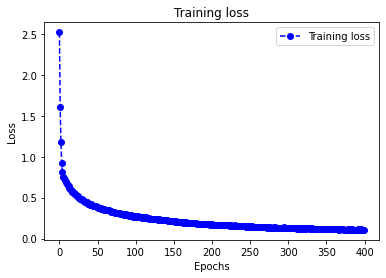

In [14]:
# Plot the training loss for each epoch to see how the model converged.
history_dict = history.history
plt.plot(range(400), history_dict['loss'], 'bo--', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Evaluate the model

In [13]:
# Evaluate the model on the test set. 
test_loss, test_acc = model.evaluate(test[['f1', 'f2', 'f3', 'f4']].values, 
          test[['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']].values, 
          verbose=2)

print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 0.1632 - accuracy: 0.9333

Test accuracy: 0.9333333373069763
